Gestational diabetes Mellitus

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

Load the Dataset 

In [3]:
data = pd.read_csv("gestational_diabetes.csv")

In [4]:
data.head()

,GDM,AP,ICP,TD,Eclampsia,Twins,Day,Age,ALT,AST,...,TBA,UREA,CREA,UA,BMG,A1MG,CysC,CO2,FPG,BMI
0,0,0,0,0,0,0,119,29,12.900000,18.300000,...,2.500000,2.940000,50.50000,211.100000,1.340000,21.050000,0.700000,24.000000,5.410000,38.021780
1,0,0,0,0,0,0,165,30,19.267422,20.341909,...,1.593159,2.689873,67.27318,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,36.471451
2,0,0,0,0,0,0,85,35,16.800000,14.400000,...,1.600000,2.580000,50.50000,189.200000,0.870000,18.420000,0.500000,24.800000,5.290000,52.455713
3,0,0,0,0,0,0,134,36,19.267422,20.341909,...,1.593159,2.689873,67.27318,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,49.184689
4,0,0,0,0,0,0,77,32,11.900000,16.200000,...,1.300000,1.980000,43.90000,188.600000,0.840000,18.310000,0.600000,20.900000,5.100000,35.396311


In [5]:
# Generating the correlation matrix for the dataset
correlation_matrix = data.corr()

# Display the correlation matrix
correlation_matrix[["GDM"]].sort_values(by="GDM", ascending=False)

,GDM
GDM,1.000000
FPG,0.336054
Age,0.176754
A1MG,0.170393
UA,0.168533
GGT,0.147328
ALP,0.119582
BMG,0.077949
Eclampsia,0.063531
ICP,0.061228


In [6]:
features = [
    "AP",
    "ICP",
    "TD",
    "Eclampsia",
    "Age",
    "BMI",
    "ALT",
    "AST",
    "GGT",
    "ALP",
    "TBA",
    "UREA",
    "CREA",
    "UA",
    "BMG",
    "A1MG",
    "CysC",
    "FPG",
]

X = data[features]

# Fit the scaler on training data
scaler = StandardScaler()
scaler.fit(X)

# Save the fitted scaler
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Exploratory Analysis 

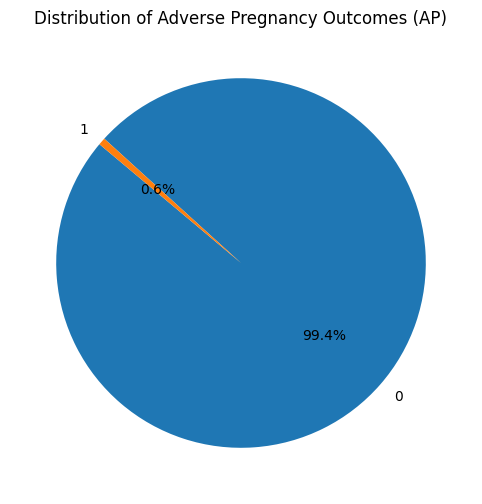

In [7]:
# Pie Chart: Distribution of adverse pregnancy (AP) outcomes
ap_counts = data[
    "AP"
].value_counts()  # Replace 'AP' with the column name for adverse pregnancy
plt.figure(figsize=(8, 6))
plt.pie(ap_counts, labels=ap_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Adverse Pregnancy Outcomes (AP)")
plt.show()

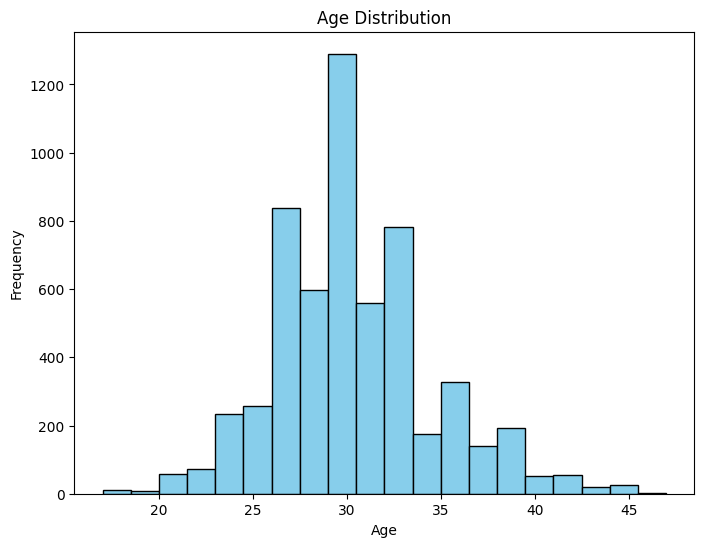

In [8]:
# Histogram: Distribution of Age
plt.figure(figsize=(8, 6))
plt.hist(
    data["Age"], bins=20, color="skyblue", edgecolor="black"
)  # Replace 'age' with the appropriate column name
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\srishti\AppData\Local\Temp\ipykernel_12792\92800538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=td_counts.index, y=td_counts.values, palette="viridis")


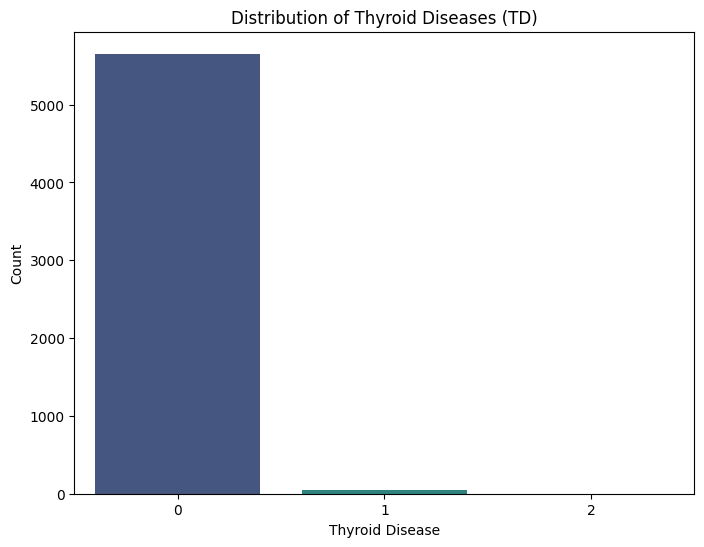

In [9]:
td_counts = data[
    "TD"
].value_counts()  # Replace 'TD' with the column name for thyroid diseases
plt.figure(figsize=(8, 6))
sns.barplot(x=td_counts.index, y=td_counts.values, palette="viridis")
plt.title("Distribution of Thyroid Diseases (TD)")
plt.xlabel("Thyroid Disease")
plt.ylabel("Count")
plt.show()

In [10]:
# Calculate summary statistics for the dataset
summary_statistics = data.describe()
summary_statistics

,GDM,AP,ICP,TD,Eclampsia,Twins,Day,Age,ALT,AST,...,TBA,UREA,CREA,UA,BMG,A1MG,CysC,CO2,FPG,BMI
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,...,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,0.217719,0.006316,0.003158,0.008070,0.010877,0.019649,109.962632,30.093333,19.743378,20.434154,...,1.599224,2.691891,77.136003,223.582438,0.956633,19.847517,0.642055,24.238442,4.778737,37.842019
std,0.412732,0.079228,0.056111,0.091419,0.103734,0.138804,39.261339,4.238510,16.723825,8.777143,...,0.980101,0.544986,384.626181,37.925837,0.103748,2.458765,0.069266,1.374203,0.395585,11.696839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.600000,8.300000,...,0.000000,1.050000,18.600000,93.700000,0.150000,0.720000,0.300000,15.600000,2.840000,17.638597
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,27.000000,12.000000,16.700000,...,1.400000,2.420000,41.200000,213.975000,0.952367,19.626514,0.640272,24.238095,4.630000,27.900273
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,30.000000,19.267422,20.341909,...,1.593159,2.689873,54.250000,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,37.861396
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,32.000000,21.100000,20.765597,...,1.621019,2.790000,67.273180,235.697195,0.971961,20.641597,0.648459,24.238539,4.980000,47.938886
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,167.000000,47.000000,310.700000,194.400000,...,24.700000,8.140000,12024.100000,550.500000,2.510000,48.730000,1.700000,33.000000,11.950000,58.042632


Data cleaning 

In [12]:
X = data.drop(columns=["GDM"])  # Assuming 'GDM' is the target column
y = data["GDM"]

Number of Columns and rows in the dataset 

In [13]:
data.shape

(5700, 26)

Getting the stastical measures of the data 

In [14]:
data.describe()

,GDM,AP,ICP,TD,Eclampsia,Twins,Day,Age,ALT,AST,...,TBA,UREA,CREA,UA,BMG,A1MG,CysC,CO2,FPG,BMI
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,...,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,0.217719,0.006316,0.003158,0.008070,0.010877,0.019649,109.962632,30.093333,19.743378,20.434154,...,1.599224,2.691891,77.136003,223.582438,0.956633,19.847517,0.642055,24.238442,4.778737,37.842019
std,0.412732,0.079228,0.056111,0.091419,0.103734,0.138804,39.261339,4.238510,16.723825,8.777143,...,0.980101,0.544986,384.626181,37.925837,0.103748,2.458765,0.069266,1.374203,0.395585,11.696839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.600000,8.300000,...,0.000000,1.050000,18.600000,93.700000,0.150000,0.720000,0.300000,15.600000,2.840000,17.638597
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,27.000000,12.000000,16.700000,...,1.400000,2.420000,41.200000,213.975000,0.952367,19.626514,0.640272,24.238095,4.630000,27.900273
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,30.000000,19.267422,20.341909,...,1.593159,2.689873,54.250000,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,37.861396
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,32.000000,21.100000,20.765597,...,1.621019,2.790000,67.273180,235.697195,0.971961,20.641597,0.648459,24.238539,4.980000,47.938886
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,167.000000,47.000000,310.700000,194.400000,...,24.700000,8.140000,12024.100000,550.500000,2.510000,48.730000,1.700000,33.000000,11.950000,58.042632


In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building the model

In [17]:
# Set up the parameter grid to tune hyperparameters
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [10, 20, 30],  # Maximum depth of each tree
    "min_samples_split": [2, 5, 10,],  # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum number of samples required in a leaf node
    "max_features": ["sqrt","log2",],  # Number of features to consider when looking for the best split
}

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring="accuracy"
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test set using the best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:
# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(
    max_depth=20,
    max_features="log2",
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
)

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.9482456140350877
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       892
           1       0.99      0.77      0.87       248

    accuracy                           0.95      1140
   macro avg       0.97      0.88      0.92      1140
weighted avg       0.95      0.95      0.95      1140



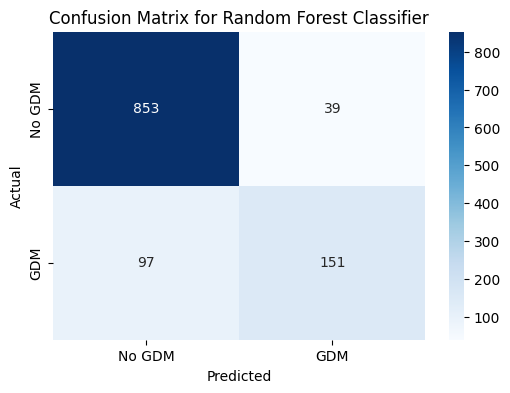

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No GDM", "GDM"],
    yticklabels=["No GDM", "GDM"],
)

plt.title("Confusion Matrix for Random Forest Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

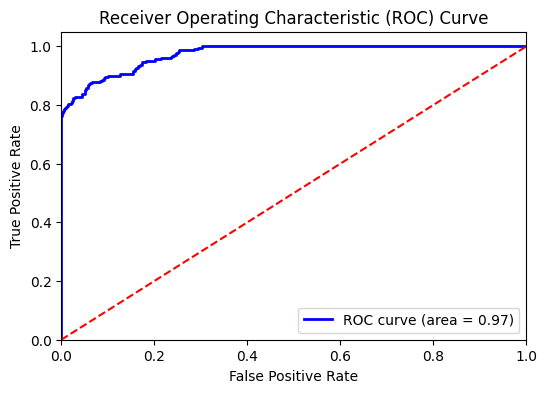

In [33]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ROC Curve
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Get predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Using Deep Learning

In [21]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=75,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6660 - loss: 0.6038 - val_accuracy: 0.8015 - val_loss: 0.4345
Epoch 2/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.4055 - val_accuracy: 0.8268 - val_loss: 0.3982
Epoch 3/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.3857 - val_accuracy: 0.8465 - val_loss: 0.3850
Epoch 4/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3521 - val_accuracy: 0.8520 - val_loss: 0.3715
Epoch 5/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.3228 - val_accuracy: 0.8531 - val_loss: 0.3623
Epoch 6/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8868 - loss: 0.3195 - val_accuracy: 0.8629 - val_loss: 0.3430
Epoch 7/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.3052 - val_accuracy: 0.8684 - val_loss: 0.3332
Epoch 8/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8989 - loss: 0.2733 - val_accuracy: 0.

In [24]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8783 - loss: 0.2870 
Test Accuracy: 0.8807


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


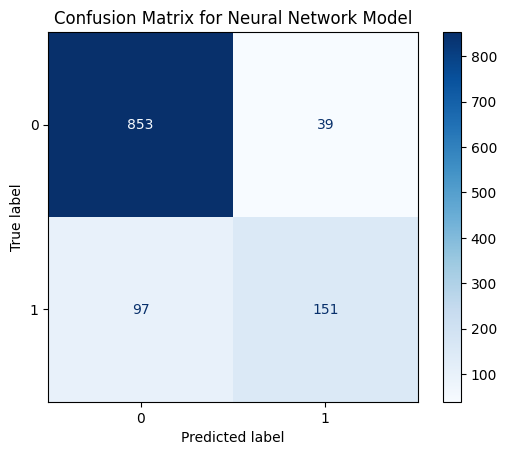

In [25]:
# Predict on the test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(
    "int32"
)  # Convert probabilities to class labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Neural Network Model")
plt.show()

In [26]:
import matplotlib.pyplot as plt

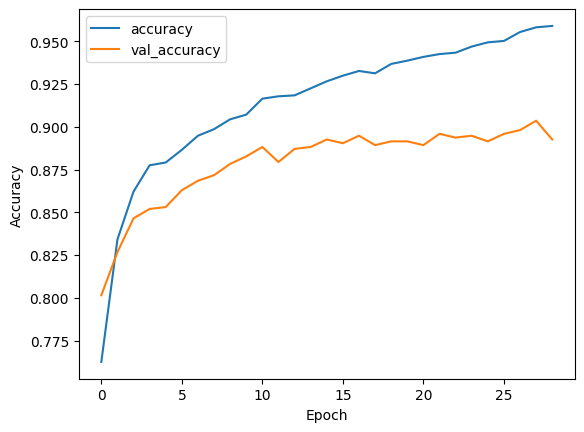

In [27]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

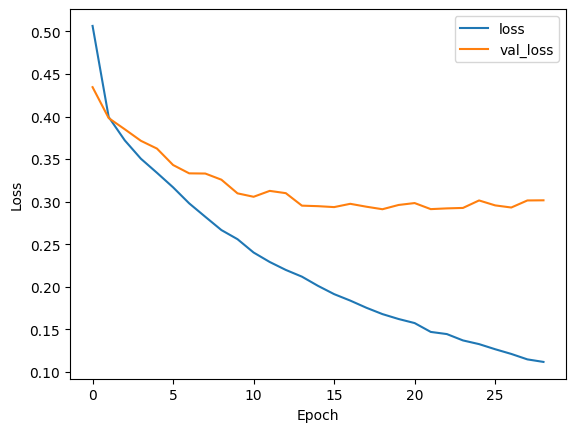

In [28]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [29]:
# After training the model, save it to a file
model.save("gdm_model.h5")